In [22]:
import random
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from ipywidgets import widgets
from ipywidgets import interact, interact_manual, interactive

Exception while loading config file /var/pod/.ws/ax-ext/config/wscloud/jupyter_notebook_config.py
    Traceback (most recent call last):
      File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/traitlets/config/application.py", line 737, in _load_config_files
        config = loader.load_config()
      File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/traitlets/config/loader.py", line 616, in load_config
        self._read_file_as_dict()
      File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/traitlets/config/loader.py", line 648, in _read_file_as_dict
        exec(compile(f.read(), conf_filename, 'exec'), namespace, namespace)
      File "/var/pod/.ws/ax-ext/config/wscloud/jupyter_notebook_config.py", line 17, in <module>
        from cdsax_jupyter_extensions.ax_log import ax_log_request
    ModuleNotFoundError: No module named 'cdsax_jupyter_extensions'
Enabling notebook extension jupyter-js-widgets/extension...
Traceback (most recent ca

In [14]:
x_bounds = np.array([0,13])
x_buffer = np.array([1,-1])

y_bounds = np.array([0,16])
y_buffer = np.array([1,-1])

x_plot = x_bounds + x_buffer
y_plot = y_bounds + y_buffer

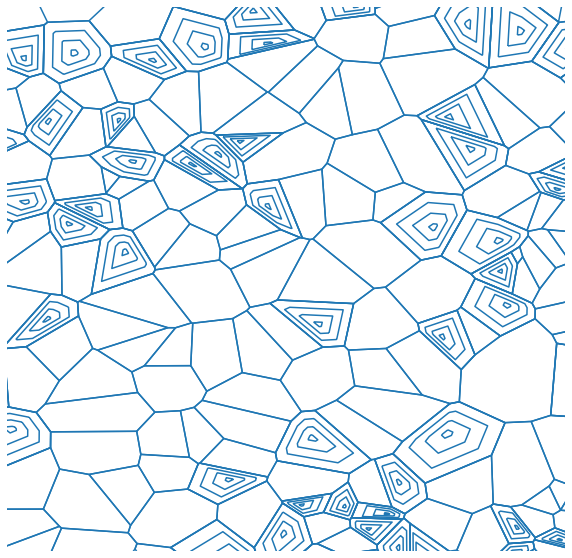

In [25]:
def plotter_poly_art(num_points=200, perc_fill=0.3, n_fill_lines=4, min_scale=0.1, guides=False):
    
    x = np.random.uniform(low=0, high=1, size=num_points).reshape(num_points, 1)*x_bounds[1]
    y = np.random.uniform(low=0, high=1, size=num_points).reshape(num_points, 1)*y_bounds[1]
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions

    shapes_ind = [x + x[0:1] for i,x in enumerate(shapes_ind) if len(x) != 0 and -1 not in x]
    shapes = [verts[x] for i,x in enumerate(shapes_ind)]
    
    total_polys = len(shapes)
    filled_polys = int(perc_fill*total_polys)
    polygon_ind = random.sample(range(total_polys), filled_polys)

    for i in range(filled_polys):
        polygon = shapes[polygon_ind[i]]
    
        center = np.mean(polygon, axis=0)
        poly_center = polygon - center

        for i in np.linspace(min_scale, 1, num=n_fill_lines):
            scaled_poly = i*(poly_center)+center
            shapes.append(scaled_poly)
    
    fig, ax = plt.subplots(figsize=(10,10))

    if not guides:
        plt.grid(False)
        plt.axis('off')
    
    ax.set_xlim(x_plot)
    ax.set_ylim(y_plot)
    lc = LineCollection(shapes)
    ax.add_collection(lc)
    
    return fig, ax

slider = interactive(plotter_poly_art,
                     num_points=(10,1000,10),
                     perc_fill=(0,1,0.05),
                     n_fill_lines=(1,20,1),
                     min_scale=(0,2,0.01))
display(slider)